In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import pyRofex
#pyRofex.initialize(user="XXXXXX",      GENERATE API
#                   password="XXXXXX",
#                   account="XXXXXX",
#                   environment=pyRofex.Environment.REMARKET)


In [6]:
# Make the call, in dates format, you are gonna get a dictionary that only needs trades
end = dt.date.today()
start = dt.date.today() - dt.timedelta(days=5)
historic_trades = pyRofex.get_trade_history(ticker=input(), start_date=start, end_date=end)
trades = pd.DataFrame(historic_trades['trades']) # get dataframe from trades dictionary


RFX20Dic20


<AxesSubplot:xlabel='datetime'>

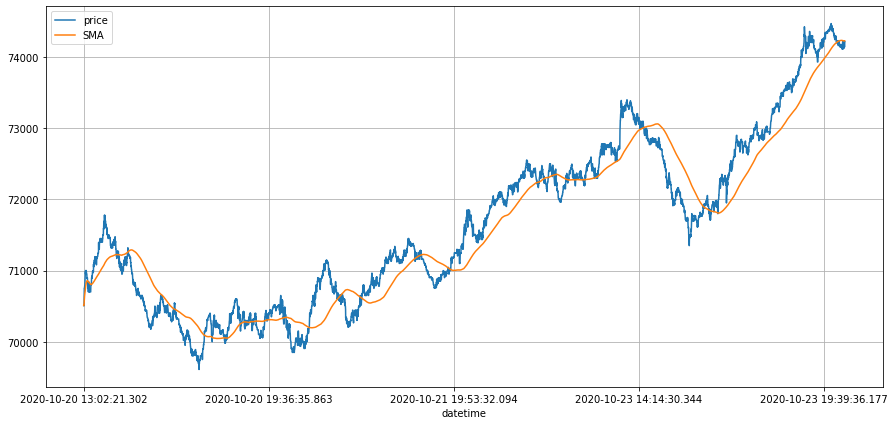

In [10]:
# re-structure data in a clean dataframe
data = pd.DataFrame(trades['price'].values, columns=['price'], index=trades['datetime'])
data['SMA'] = data['price'].rolling(round(len(data)*0.05), min_periods=1).mean() # a signal to test
data.plot(figsize=(15,7),grid=True)